# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Pip'd city lib
# !!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


627

In [7]:
weather_data["City"] = cities
weather_data.head()

,City,Temperature,Humidity,Clouds,Wind Speed
0,vaini,NaN,NaN,NaN,NaN
1,san rafael del sur,NaN,NaN,NaN,NaN
2,peleduy,NaN,NaN,NaN,NaN
3,albany,NaN,NaN,NaN,NaN
4,monticello,NaN,NaN,NaN,NaN


In [13]:
# Create empty columns to hold value
temp = []
humidity =[]
clouds = []
wind = []

counter = 0
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

#Iterate through rows in dataframe and initiate API calls based on cities in the cities list
print("Begin Data Retrieval")
print("-----------------------------")
for index, row in weather_data.iterrows():
    counter +=1
    city = row["City"]
    target_url = f"{url}{city}&appid={api_key}&units={units}"
    info = requests.get(target_url).json()
    if info["cod"] == "404":
        print("City not found, skipping...")

    else:
        print("Processing City#:"+str(counter), ' | ' , {city})
        print("The name of the city is "+row["City"])
        print(target_url)
        temp.append(info['main']['temp'])
        humidity.append(info['main']['humidity'])
        clouds.append(info['clouds']['all'])
        wind.append(info['wind']['speed'])
        time.sleep(1)

Begin Data Retrieval
-----------------------------
Processing City#:1  |  {'vaini'}
The name of the city is vaini
https://api.openweathermap.org/data/2.5/weather?q=vaini&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:2  |  {'san rafael del sur'}
The name of the city is san rafael del sur
https://api.openweathermap.org/data/2.5/weather?q=san rafael del sur&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:3  |  {'peleduy'}
The name of the city is peleduy
https://api.openweathermap.org/data/2.5/weather?q=peleduy&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:4  |  {'albany'}
The name of the city is albany
https://api.openweathermap.org/data/2.5/weather?q=albany&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:5  |  {'monticello'}
The name of the city is monticello
https://api.openweathermap.org/data/2.5/weather?q=monticello&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:6  |

Processing City#:49  |  {'yellowknife'}
The name of the city is yellowknife
https://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:50  |  {'kavieng'}
The name of the city is kavieng
https://api.openweathermap.org/data/2.5/weather?q=kavieng&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:51  |  {'arawa'}
The name of the city is arawa
https://api.openweathermap.org/data/2.5/weather?q=arawa&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:52  |  {'mundgod'}
The name of the city is mundgod
https://api.openweathermap.org/data/2.5/weather?q=mundgod&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:53  |  {'zyryanovsk'}
The name of the city is zyryanovsk
https://api.openweathermap.org/data/2.5/weather?q=zyryanovsk&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:54  |  {'hilo'}
The name of the city is hilo
https://api.openweather

Processing City#:97  |  {'acapulco'}
The name of the city is acapulco
https://api.openweathermap.org/data/2.5/weather?q=acapulco&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:98  |  {'benton'}
The name of the city is benton
https://api.openweathermap.org/data/2.5/weather?q=benton&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:99  |  {'saint-philippe'}
The name of the city is saint-philippe
https://api.openweathermap.org/data/2.5/weather?q=saint-philippe&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
City not found, skipping...
Processing City#:101  |  {'oranjemund'}
The name of the city is oranjemund
https://api.openweathermap.org/data/2.5/weather?q=oranjemund&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:102  |  {'santa isabel do rio negro'}
The name of the city is santa isabel do rio negro
https://api.openweathermap.org/data/2.5/weather?q=santa isabel do rio negro&appid=f487f14b93f524815f27e82e5a8ab8ae&u

City not found, skipping...
Processing City#:145  |  {'xuzhou'}
The name of the city is xuzhou
https://api.openweathermap.org/data/2.5/weather?q=xuzhou&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:146  |  {'chattanooga'}
The name of the city is chattanooga
https://api.openweathermap.org/data/2.5/weather?q=chattanooga&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:147  |  {'goure'}
The name of the city is goure
https://api.openweathermap.org/data/2.5/weather?q=goure&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:148  |  {'kodiak'}
The name of the city is kodiak
https://api.openweathermap.org/data/2.5/weather?q=kodiak&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:149  |  {'saint george'}
The name of the city is saint george
https://api.openweathermap.org/data/2.5/weather?q=saint george&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:150  |  {'shimoda'}
The name of the

Processing City#:193  |  {'luderitz'}
The name of the city is luderitz
https://api.openweathermap.org/data/2.5/weather?q=luderitz&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:194  |  {'lagoa'}
The name of the city is lagoa
https://api.openweathermap.org/data/2.5/weather?q=lagoa&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:195  |  {'jalingo'}
The name of the city is jalingo
https://api.openweathermap.org/data/2.5/weather?q=jalingo&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:196  |  {'la rioja'}
The name of the city is la rioja
https://api.openweathermap.org/data/2.5/weather?q=la rioja&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:197  |  {'wegorzewo'}
The name of the city is wegorzewo
https://api.openweathermap.org/data/2.5/weather?q=wegorzewo&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:198  |  {'vyazma'}
The name of the city is vyazma
https://api.openweathe

Processing City#:243  |  {'marienburg'}
The name of the city is marienburg
https://api.openweathermap.org/data/2.5/weather?q=marienburg&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:244  |  {'chuy'}
The name of the city is chuy
https://api.openweathermap.org/data/2.5/weather?q=chuy&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:245  |  {'dali'}
The name of the city is dali
https://api.openweathermap.org/data/2.5/weather?q=dali&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:246  |  {'prince rupert'}
The name of the city is prince rupert
https://api.openweathermap.org/data/2.5/weather?q=prince rupert&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:247  |  {'salym'}
The name of the city is salym
https://api.openweathermap.org/data/2.5/weather?q=salym&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:248  |  {'vaitape'}
The name of the city is vaitape
https://api.openweather

Processing City#:293  |  {'vardo'}
The name of the city is vardo
https://api.openweathermap.org/data/2.5/weather?q=vardo&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
City not found, skipping...
Processing City#:295  |  {'yar-sale'}
The name of the city is yar-sale
https://api.openweathermap.org/data/2.5/weather?q=yar-sale&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:296  |  {'swan hill'}
The name of the city is swan hill
https://api.openweathermap.org/data/2.5/weather?q=swan hill&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
City not found, skipping...
Processing City#:298  |  {'carnarvon'}
The name of the city is carnarvon
https://api.openweathermap.org/data/2.5/weather?q=carnarvon&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:299  |  {'emba'}
The name of the city is emba
https://api.openweathermap.org/data/2.5/weather?q=emba&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:300  |  {'guarapari'}


Processing City#:344  |  {'dolinsk'}
The name of the city is dolinsk
https://api.openweathermap.org/data/2.5/weather?q=dolinsk&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:345  |  {'puerto escondido'}
The name of the city is puerto escondido
https://api.openweathermap.org/data/2.5/weather?q=puerto escondido&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:346  |  {'taulov'}
The name of the city is taulov
https://api.openweathermap.org/data/2.5/weather?q=taulov&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:347  |  {'adrar'}
The name of the city is adrar
https://api.openweathermap.org/data/2.5/weather?q=adrar&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:348  |  {'moussoro'}
The name of the city is moussoro
https://api.openweathermap.org/data/2.5/weather?q=moussoro&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:349  |  {'karratha'}
The name of the city is karratha
htt

Processing City#:398  |  {'grand gaube'}
The name of the city is grand gaube
https://api.openweathermap.org/data/2.5/weather?q=grand gaube&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:399  |  {'caravelas'}
The name of the city is caravelas
https://api.openweathermap.org/data/2.5/weather?q=caravelas&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:400  |  {'opuwo'}
The name of the city is opuwo
https://api.openweathermap.org/data/2.5/weather?q=opuwo&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:401  |  {'tazovskiy'}
The name of the city is tazovskiy
https://api.openweathermap.org/data/2.5/weather?q=tazovskiy&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:402  |  {'ocampo'}
The name of the city is ocampo
https://api.openweathermap.org/data/2.5/weather?q=ocampo&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:403  |  {'pisco'}
The name of the city is pisco
https://api.ope

Processing City#:447  |  {'harwich'}
The name of the city is harwich
https://api.openweathermap.org/data/2.5/weather?q=harwich&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:448  |  {'necochea'}
The name of the city is necochea
https://api.openweathermap.org/data/2.5/weather?q=necochea&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:449  |  {'dhidhdhoo'}
The name of the city is dhidhdhoo
https://api.openweathermap.org/data/2.5/weather?q=dhidhdhoo&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:450  |  {'dubrovnik'}
The name of the city is dubrovnik
https://api.openweathermap.org/data/2.5/weather?q=dubrovnik&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
City not found, skipping...
Processing City#:452  |  {'nioro'}
The name of the city is nioro
https://api.openweathermap.org/data/2.5/weather?q=nioro&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:453  |  {'bilibino'}
The name of the city

Processing City#:496  |  {'college'}
The name of the city is college
https://api.openweathermap.org/data/2.5/weather?q=college&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:497  |  {'sartell'}
The name of the city is sartell
https://api.openweathermap.org/data/2.5/weather?q=sartell&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:498  |  {'queimadas'}
The name of the city is queimadas
https://api.openweathermap.org/data/2.5/weather?q=queimadas&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:499  |  {'bonavista'}
The name of the city is bonavista
https://api.openweathermap.org/data/2.5/weather?q=bonavista&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:500  |  {'sao jose da coroa grande'}
The name of the city is sao jose da coroa grande
https://api.openweathermap.org/data/2.5/weather?q=sao jose da coroa grande&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:501  |  {'kruis

Processing City#:547  |  {'dukhovshchina'}
The name of the city is dukhovshchina
https://api.openweathermap.org/data/2.5/weather?q=dukhovshchina&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:548  |  {'beloha'}
The name of the city is beloha
https://api.openweathermap.org/data/2.5/weather?q=beloha&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:549  |  {'constitucion'}
The name of the city is constitucion
https://api.openweathermap.org/data/2.5/weather?q=constitucion&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:550  |  {'mana'}
The name of the city is mana
https://api.openweathermap.org/data/2.5/weather?q=mana&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:551  |  {'escanaba'}
The name of the city is escanaba
https://api.openweathermap.org/data/2.5/weather?q=escanaba&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:552  |  {'luanda'}
The name of the city is luanda
http

Processing City#:594  |  {'orito'}
The name of the city is orito
https://api.openweathermap.org/data/2.5/weather?q=orito&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:595  |  {'reconquista'}
The name of the city is reconquista
https://api.openweathermap.org/data/2.5/weather?q=reconquista&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:596  |  {'chengde'}
The name of the city is chengde
https://api.openweathermap.org/data/2.5/weather?q=chengde&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:597  |  {'zaysan'}
The name of the city is zaysan
https://api.openweathermap.org/data/2.5/weather?q=zaysan&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
City not found, skipping...
Processing City#:599  |  {'akersberga'}
The name of the city is akersberga
https://api.openweathermap.org/data/2.5/weather?q=akersberga&appid=f487f14b93f524815f27e82e5a8ab8ae&units=imperial
Processing City#:600  |  {'sambava'}
The name of the ci

ValueError: Length of values does not match length of index

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
#Assign values from API calls to dataframe
weather_data= pd.DataFrame(columns =["City","Latitude", "Temperature","Humidity","Cloudiness","Wind Speed"])
weather_data["City"] = pd.Series(cities)
weather_data["Latitude"] = pd.Series(lats)
weather_data["Temperature"]= pd.Series(temp)
weather_data["Humidity"]= pd.Series(humidity)
weather_data["Cloudiness"]= pd.Series(clouds)
weather_data["Wind Speed"]= pd.Series(wind)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather_data.count()

City           627
Latitude       627
Temperature    560
Humidity       560
Cloudiness     560
Wind Speed     560
dtype: int64

In [36]:
weather_data.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,vaini,-79.162209,89.60,38.0,0.0,4.27
1,san rafael del sur,11.227140,80.10,57.0,0.0,12.77
2,peleduy,60.923558,18.54,63.0,80.0,6.73
3,albany,-81.493112,24.82,44.0,1.0,6.93
4,monticello,33.427435,26.69,92.0,1.0,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

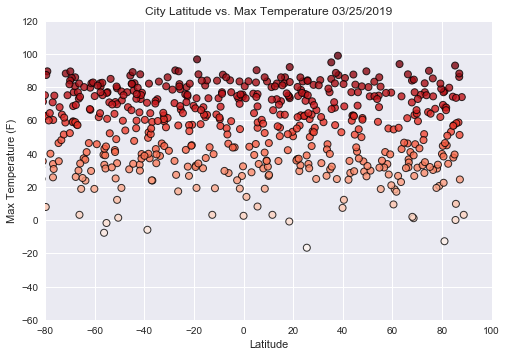

In [39]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Temperature"], c=weather_data["Temperature"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Reds', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

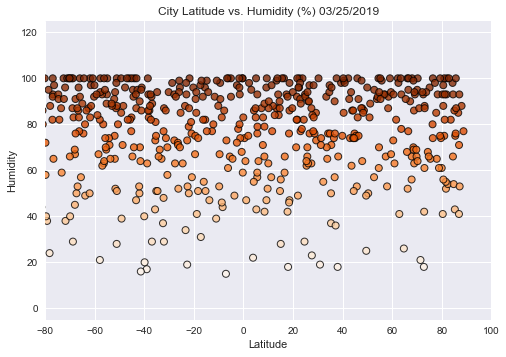

In [40]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Humidity"], c=weather_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Oranges', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

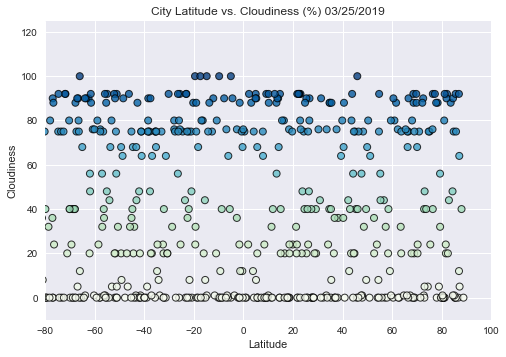

In [41]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Cloudiness"], c=weather_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])


# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

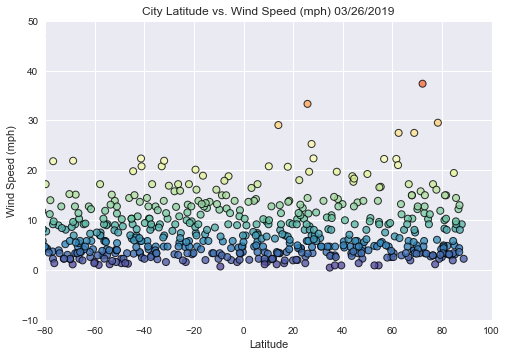

In [43]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Wind Speed"], c=weather_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()